# IMPORTS AND READ CSV

In [14]:
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.regression.linear_model import yule_walker
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df_time_series = pd.read_csv('datasets/historical_demand_sum.csv', index_col='time_index')
df_time_series.head()

,demand_MWh
time_index,
2012-01,1.080470e+07
2012-02,1.008555e+07
2012-03,1.017537e+07
2012-04,8.969068e+06
2012-05,9.597272e+06


<AxesSubplot: xlabel='time_index'>

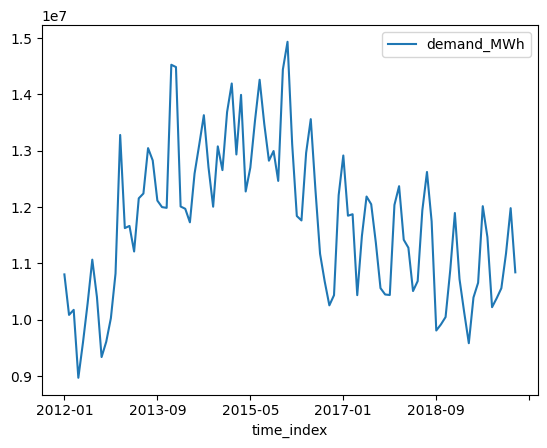

In [3]:
df_time_series.plot()

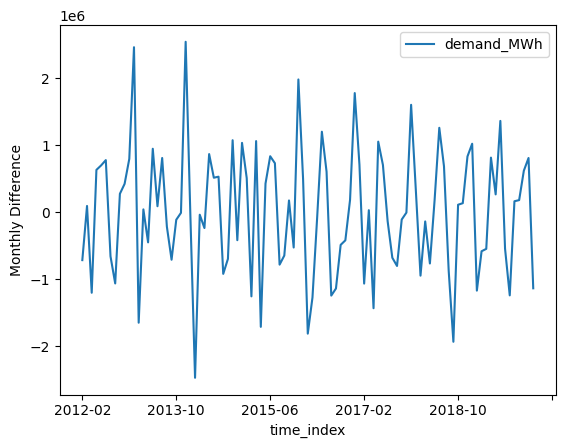

In [4]:
# Need to difference
df_time_series_diff = df_time_series.diff().dropna()
ax = df_time_series_diff.plot()
ax.set_ylabel("Monthly Difference")
plt.show()

In [6]:
utils.is_stationary(df_time_series_diff)

False

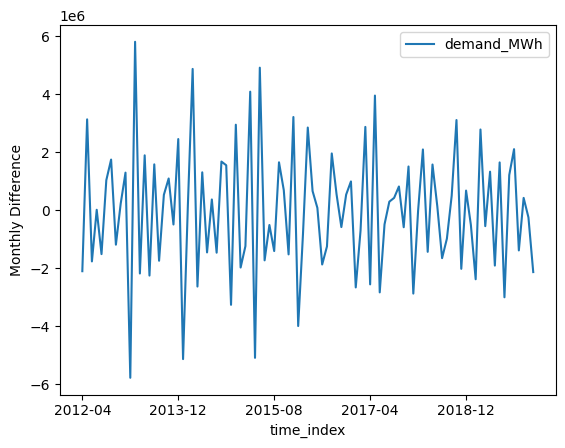

In [9]:
# Differenciate again
df_time_series_diff = df_time_series_diff.diff().dropna()
ax = df_time_series_diff.plot()
ax.set_ylabel("Monthly Difference")
plt.show()

In [8]:
utils.is_stationary(df_time_series_diff)

True

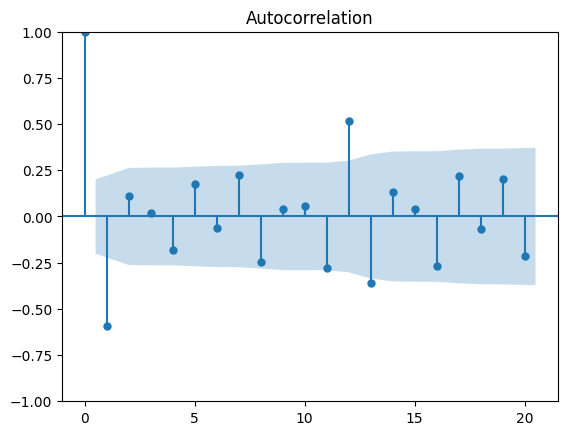

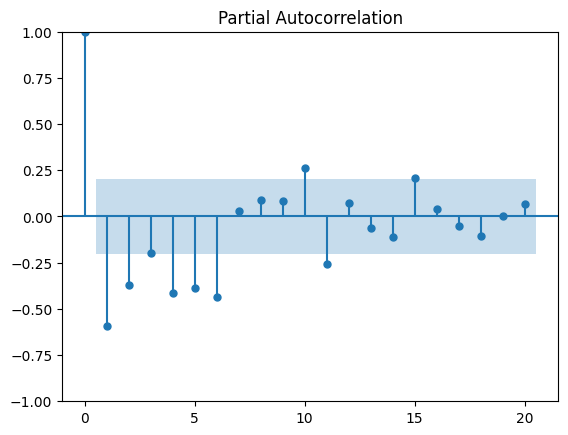

In [13]:
plot_acf(df_time_series_diff, lags=20)
plot_pacf(df_time_series_diff, lags=20, method="ywm")
plt.show()

# FIT

/home/tomas/codes/electric_energy_demand_argentina/env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/tomas/codes/electric_energy_demand_argentina/env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/tomas/codes/electric_energy_demand_argentina/env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


TypeError: tz must be string or tzinfo subclass.

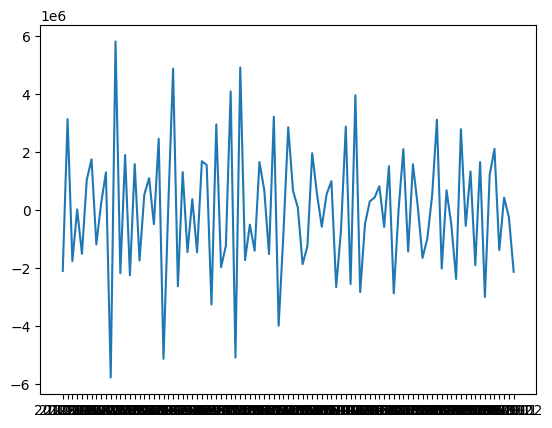

In [17]:
# Forecast the first MA(1) model
mod = ARIMA(df_time_series_diff, order=(0,0,1))
res = mod.fit()
orig_data = df_time_series_diff
pred = res.predict()
plt.plot(orig_data)
plt.plot(pred)
plt.show()